In [1]:
import pandas as pd
import numpy as np

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileDownloaded = drive.CreateFile({'id':'1xLrAlsJLsHbIw3mfQkN3dNav1ofUEY4g'})
fileDownloaded.GetContentFile('train.csv')

MessageError: ignored

In [146]:
df_train = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1W30emm0hDMxWOXisPjRh4J_fiRnXx3KM'})
fileDownloaded.GetContentFile('test.csv')
df_test=pd.read_csv('test.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


First look of data

In [ ]:
print(f"df_train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns")
print(f"df_test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns")

df_train dataset has 891 rows and 12 columns
df_test dataset has 418 rows and 11 columns


In [ ]:
# finding missing columns in test data set
df_train.columns.difference(df_test.columns)

Index(['Survived'], dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data Cleaning

In [ ]:
df_train.isna().sum().sort_values(ascending=False)
# 3 fields have null values (Cabin,Age,Embarked)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
df_test.isna().sum().sort_values(ascending=False)
# 3 fields have null values (Cabin,Age,Fare)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [147]:
# Combining the data set
df_all=pd.concat([df_train,df_test],sort=True,ignore_index=True) ## Sort will sort the column as per names and ignore_index to reset index
## alternate: pd.concat([df_train,df_test],sort=True).reset_index(drop=True)

In [ ]:
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


Handling null values

In [5]:
df_all.isna().sum().sort_values(ascending=False) ## 5 fields to deal with

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dtype: int64

In [ ]:
####Working on Age field########
# How many nulls are present
print(f'number of null values in Age field: {df_all["Age"].isna().sum()}') # 263
print(f'Percentage of missing null values in Age field: {(df_all["Age"].isna().sum()/len(df_all["Age"]))*100}')
print(len(df_all['Age']))

number of null values in Age field: 263
Percentage of missing null values in Age field: 20.091673032849503
1309


In [ ]:
df_all.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [ ]:
df_train[df_train['Age'].isna()==True].groupby(['Pclass','Sex'])['PassengerId'].count() #11+28+3+13+64+144

Pclass  Sex   
1       female     9
        male      21
2       female     2
        male       9
3       female    42
        male      94
Name: PassengerId, dtype: int64

In [ ]:
df_all.groupby(['Pclass','Sex'])['Age'].agg(['median','mean'])
# median: is the midldle value of distribution
# mean: is the average value of distribution
# mode: is the most frequently occuring value of the distribution

median       mean
Pclass Sex                      
1      female    36.0  37.037594
       male      42.0  41.029272
2      female    28.0  27.499223
       male      29.5  30.815380
3      female    22.0  22.185329
       male      25.0  25.962264

In [ ]:
dftest=pd.DataFrame(df_train.groupby(['Pclass','Sex'])['Age'])

In [ ]:
dftest

,0,1
0,"(1, female)",1 38.0 3 35.0 11 58.0 31 Na...
1,"(1, male)",6 54.0 23 28.0 27 19.0 30 40....
2,"(2, female)",9 14.0 15 55.0 41 27.0 43 3....
3,"(2, male)",17 NaN 20 35.0 21 34.0 33 66....
4,"(3, female)",2 26.0 8 27.0 10 4.0 14 14....
5,"(3, male)",0 22.0 4 35.0 5 NaN 7 2....


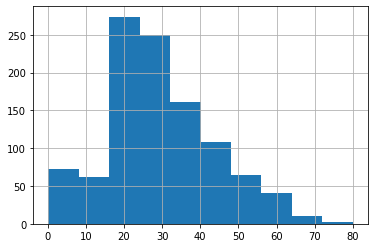

In [ ]:
# checking data distribution (appears skewed)
df_all['Age'].hist()

In [ ]:
df_all['Age'].median() # As data is right skewed we will use median and not mean

28.0

In [148]:
# replacing null values in age based on categories
df_all['Age']=df_all.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))

In [149]:
df_all['Age'].isna().sum()

0

In [ ]:
####Working on Fare field########
# How many nulls are present
print(f'number of null values in Fare field: {df_all["Fare"].isna().sum()}') # 1
print(f'Percentage of missing null values in Fare field: {(df_all["Fare"].isna().sum()/len(df_all["Fare"]))*100}')

number of null values in Fare field: 1
Percentage of missing null values in Fare field: 0.07639419404125286


In [ ]:
df_all[df_all['Fare'].isnull()] #SibSp=0 and Pclass=3 and Embarked=S

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


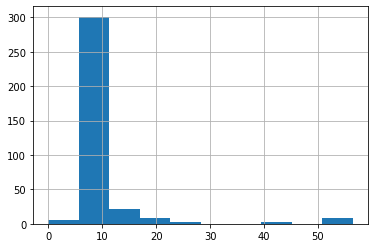

In [ ]:
df_all[(df_all['Pclass']==3)&(df_all['Embarked']=='S')&(df_all['SibSp']==0)]['Fare'].hist() # skewed
# df_all['Fare'].hist() -- skewed

In [8]:
# verification
print(df_all['Fare'].median())
print(df_all['Fare'].isna().sum())
print(len(df_all[df_all['Fare']==median_fare]))

14.4542
1


NameError: ignored

In [150]:
median_fare=df_all[(df_all['Pclass']==3)&(df_all['Embarked']=='S')&(df_all['SibSp']==0)]['Fare'].median()
df_all['Fare'].fillna(median_fare,inplace=True)

In [10]:
print(df_all['Fare'].median())
print(df_all['Fare'].isna().sum())
print(len(df_all[df_all['Fare']==median_fare]))

14.4542
0
24


In [ ]:
####Working on Embarked field########
# How many nulls are present
print(f'number of null values in Embarked field: {df_all["Embarked"].isna().sum()}') # 1
print(f'Percentage of missing null values in Embarked field: {(df_all["Embarked"].isna().sum()/len(df_all["Embarked"]))*100}')

number of null values in Embarked field: 2
Percentage of missing null values in Embarked field: 0.15278838808250572


In [ ]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [ ]:
df_all[(df_all['Pclass']==1)&(df_all['Fare']<=80.0)&(df_all['SibSp']==0)]['Embarked'].value_counts()

S    88
C    58
Name: Embarked, dtype: int64

In [ ]:
# verification
print(df_all['Embarked'].value_counts())
print(df_all['Embarked'].isna().sum())
print(len(df_all[df_all['Embarked']=='S']))

S    914
C    270
Q    123
Name: Embarked, dtype: int64
2
914


In [151]:
# Few more researches on google gave the dteails they embarked at Southampton
df_all['Embarked'].fillna('S',inplace=True)

In [12]:
print(df_all['Embarked'].value_counts())
print(df_all['Embarked'].isna().sum())
print(len(df_all[df_all['Embarked']=='S']))

S    916
C    270
Q    123
Name: Embarked, dtype: int64
0
916


In [ ]:
####Working on Cabin field########
# How many nulls are present
print(f'number of null values in Cabin field: {df_all["Cabin"].isna().sum()}') # 1
print(f'Percentage of missing null values in Cabin field: {(df_all["Cabin"].isna().sum()/len(df_all["Cabin"]))*100}')

number of null values in Cabin field: 1014
Percentage of missing null values in Cabin field: 77.46371275783041


In [ ]:
# How many unique values
print(df_all['Cabin'].nunique())
df_all['Cabin'].unique()

186


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df_all[df_all['Cabin'].isna()==False]['Cabin'].map(lambda x:x[0]).value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [ ]:
df_all.loc[df_all['Cabin'].str.startswith('T')==True,'Cabin']

339    T
Name: Cabin, dtype: object

In [ ]:
# creating a new column as deck from first letter of Cabin Column
df_all['Cabin'].apply(lambda x:'M' if pd.isnull(x) else x[0])

0       M
1       C
2       M
3       C
4       M
       ..
1304    M
1305    C
1306    M
1307    M
1308    M
Name: Cabin, Length: 1309, dtype: object

In [ ]:
print(df_all[df_all['Cabin'].isna()==False]['Cabin'].map(lambda x:x[0]).value_counts())
print(df_all['Cabin'].isna().sum())

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64
1014


In [152]:
df_all['Deck']=df_all['Cabin'].apply(lambda x:'M' if pd.isnull(x) else x[0])

In [14]:
print(df_all['Deck'].value_counts())
print(df_all['Deck'].isna().sum())

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64
0


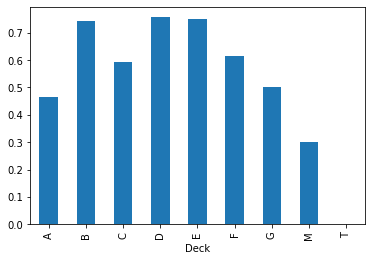

In [ ]:
df_all.groupby('Deck')['Survived'].mean().plot(kind='bar')

In [ ]:
df_all.groupby(['Deck','Survived'])['PassengerId'].count()

Deck  Survived
A     0.0           8
      1.0           7
B     0.0          12
      1.0          35
C     0.0          24
      1.0          35
D     0.0           8
      1.0          25
E     0.0           8
      1.0          24
F     0.0           5
      1.0           8
G     0.0           2
      1.0           2
M     0.0         481
      1.0         206
T     0.0           1
Name: PassengerId, dtype: int64

In [236]:
df_all[df_all['Deck']=='A']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Farebin,Agebin,Family_Size,Family_Size_bin,Title,Title_new,Age_pclass


In [154]:
df_all.loc[339,'Deck']='A'

In [ ]:
print(df_all['Deck'].value_counts())

M    1014
C      94
B      65
D      46
E      41
A      23
F      21
G       5
Name: Deck, dtype: int64


In [ ]:
df_all.groupby('Pclass')['Fare'].agg(['min','max','mean'])

,min,max,mean
Pclass,,,
1,0.0,512.3292,87.508992
2,0.0,73.5000,21.179196
3,0.0,69.5500,13.295304


In [ ]:
df_all[(df_all['Fare']==0.0)&(df_all['Pclass']==1)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
263,40.0,B94,S,0.0,"Harrison, Mr. William",0,264,1,male,0,0.0,112059,B
633,42.0,NaN,S,0.0,"Parr, Mr. William Henry Marsh",0,634,1,male,0,0.0,112052,M
806,39.0,A36,S,0.0,"Andrews, Mr. Thomas Jr",0,807,1,male,0,0.0,112050,A
815,42.0,B102,S,0.0,"Fry, Mr. Richard",0,816,1,male,0,0.0,112058,B
822,38.0,NaN,S,0.0,"Reuchlin, Jonkheer. John George",0,823,1,male,0,0.0,19972,M
1157,42.0,NaN,S,0.0,"Chisholm, Mr. Roderick Robert Crispin",0,1158,1,male,0,NaN,112051,M
1263,49.0,B52 B54 B56,S,0.0,"Ismay, Mr. Joseph Bruce",0,1264,1,male,0,NaN,112058,B


Feature Engineering:
Techniques we will use so far:
- Binning continous variables (e.g. Age)
- Create new features out of existing variables (e.g. Title)
- Label encoding for non numeric features (e.g. Sex)
- One hot encoding for categorial features (e.g. Pclass)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1309 non-null   object 
 3   Fare         1309 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
 12  Deck         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


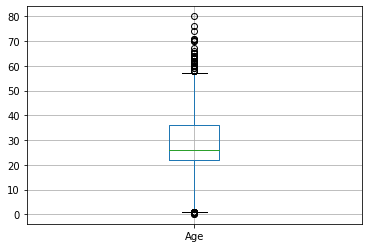

In [ ]:
df_all.boxplot(column=['Age'])

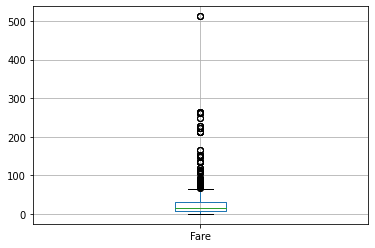

In [ ]:
df_all.boxplot(column='Fare')

In [155]:
#Technique1: Binning
df_all['Farebin']=pd.qcut(df_all['Fare'],5)
df_all['Agebin']=pd.cut(df_all['Age'].astype(int),5)
# qcut: bucketting based on number of cases
# cut: bucketting based on spread of values

In [ ]:
df_all['Agebin'].value_counts()

(16.0, 32.0]     752
(32.0, 48.0]     304
(-0.08, 16.0]    134
(48.0, 64.0]     106
(64.0, 80.0]      13
Name: Agebin, dtype: int64

In [238]:
df_all['Farebin'].value_counts()


0    275
3    265
4    259
1    255
2    255
Name: Farebin, dtype: int64

In [241]:
df_all[['Fare','Farebin']].sort_values(by='Farebin')

,Fare,Farebin
0,7.2500,0
653,7.8292,0
649,7.5500,0
648,7.5500,0
640,7.8542,0
...,...,...
1108,164.8667,4
765,77.9583,4
1106,42.5000,4
539,49.5000,4


In [ ]:
# Survival rates based on age
df_all.groupby('Agebin')['Survived'].mean()

Agebin
(-0.08, 16.0]    0.550000
(16.0, 32.0]     0.337374
(32.0, 48.0]     0.412037
(48.0, 64.0]     0.434783
(64.0, 80.0]     0.090909
Name: Survived, dtype: float64

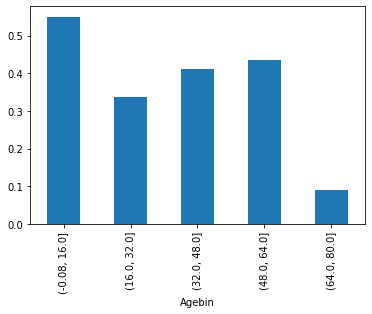

In [ ]:
df_all.groupby('Agebin')['Survived'].mean().plot(kind='bar')

In [ ]:
df_all.groupby('Farebin')['Survived'].mean()

Farebin
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.558]       0.426901
(21.558, 41.579]     0.443243
(41.579, 512.329]    0.645349
Name: Survived, dtype: float64

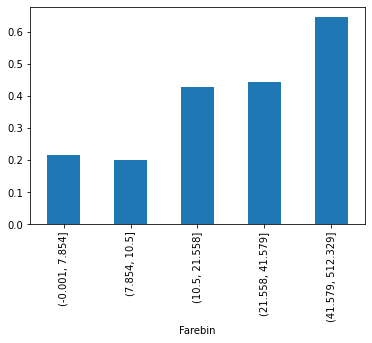

In [ ]:
df_all.groupby('Farebin')['Survived'].mean().plot(kind='bar')

In [156]:
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Farebin,Agebin
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M,"(-0.001, 7.854]","(16.0, 32.0]"
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C,"(41.579, 512.329]","(32.0, 48.0]"
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M,"(7.854, 10.5]","(16.0, 32.0]"
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C,"(41.579, 512.329]","(32.0, 48.0]"
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M,"(7.854, 10.5]","(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,M,"(7.854, 10.5]","(16.0, 32.0]"
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,C,"(41.579, 512.329]","(32.0, 48.0]"
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,M,"(-0.001, 7.854]","(32.0, 48.0]"
1307,25.0,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,M,"(7.854, 10.5]","(16.0, 32.0]"


In [ ]:
## Techniqiue 2: Create new features out of existing variables (e.g. Title)
## 1 field familysize= SibSp+Parch+1

In [157]:
df_all[df_all['Family_Size']==11]

KeyError: ignored

In [158]:
df_all['Family_Size']=df_all['SibSp']+df_all['Parch']+1

In [ ]:
df_all['Family_Size'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_Size, dtype: int64

In [159]:
df_all['Family_Size_bin']=df_all['Family_Size'].map(lambda x:1 if x==1 else 2 if x==2 else 3 if x in (3,4) else 4)

In [ ]:
df_all[['Family_Size','Family_Size_bin']].value_counts()

Family_Size  Family_Size_bin
1            1                  790
2            2                  235
3            3                  159
4            3                   43
6            4                   25
5            4                   22
7            4                   16
11           4                   11
8            4                    8
dtype: int64

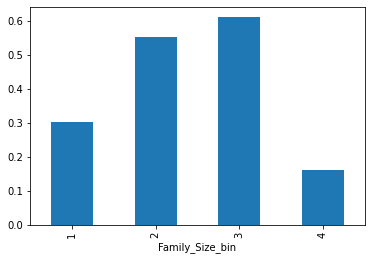

In [ ]:
df_all.groupby('Family_Size_bin')['Survived'].mean().plot(kind='bar')

In [ ]:
#Analyzing ticket frequency (but almost same as family size)
df_all.loc[df_all['Ticket'].duplicated(),'Ticket']

24                  349909
71                 CA 2144
88                   19950
117                  11668
119                 347082
               ...        
1298                113503
1300    SOTON/O.Q. 3101315
1302                 19928
1305              PC 17758
1308                  2668
Name: Ticket, Length: 380, dtype: object

In [ ]:
df_all[df_all['Ticket']=='349909']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Farebin,Agebin,Family_Size,Family_Size_bin
7,2.0,NaN,S,21.075,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,M,"(10.5, 21.558]","(-0.08, 16.0]",5,4
24,8.0,NaN,S,21.075,"Palsson, Miss. Torborg Danira",1,25,3,female,3,0.0,349909,M,"(10.5, 21.558]","(-0.08, 16.0]",5,4
374,3.0,NaN,S,21.075,"Palsson, Miss. Stina Viola",1,375,3,female,3,0.0,349909,M,"(10.5, 21.558]","(-0.08, 16.0]",5,4
567,29.0,NaN,S,21.075,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",4,568,3,female,0,0.0,349909,M,"(10.5, 21.558]","(16.0, 32.0]",5,4
1280,6.0,NaN,S,21.075,"Palsson, Master. Paul Folke",1,1281,3,male,3,NaN,349909,M,"(10.5, 21.558]","(-0.08, 16.0]",5,4


In [ ]:
# new field: Title
df_all['Name'][0].split('.')[0].split(',')[1]

' Mr'

In [160]:
df_all['Title']=df_all['Name'].map(lambda x:x.split('.')[0].split(',')[1])

In [ ]:
df_all['Title'].value_counts()
# Too many titles

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: Title, dtype: int64

In [161]:
# We want to consider only titles that have atleast 10 cases in it
lst=list(df_all['Title'].value_counts().index[4:])

In [ ]:
lst

[' Rev',
 ' Dr',
 ' Col',
 ' Mlle',
 ' Major',
 ' Ms',
 ' Lady',
 ' Sir',
 ' Mme',
 ' Don',
 ' Capt',
 ' the Countess',
 ' Jonkheer',
 ' Dona']

In [162]:
df_all['Title_new']=df_all['Title'].map(lambda x:'Misc' if x in lst else x)

In [ ]:
df_all['Title'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: Title, dtype: int64

In [ ]:
df_all['Title_new'].value_counts()

 Mr        757
 Miss      260
 Mrs       197
 Master     61
Misc        34
Name: Title_new, dtype: int64

In [23]:
df_all['Title_new']=df_all['Title_new'].str.strip()

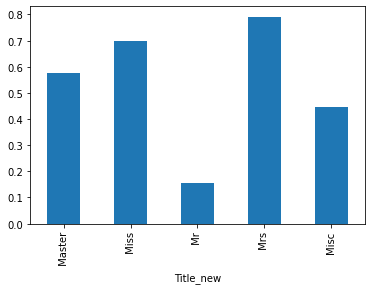

In [164]:
df_all.groupby('Title_new')['Survived'].mean().plot(kind='bar')

In [173]:
# new feature age times class
#df_all['Age_Class']= df_all['Age']* df_all['Pclass']
# we actually need it based on bins label encoding

In [171]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              1309 non-null   float64 
 1   Cabin            295 non-null    object  
 2   Embarked         1309 non-null   object  
 3   Fare             1309 non-null   float64 
 4   Name             1309 non-null   object  
 5   Parch            1309 non-null   int64   
 6   PassengerId      1309 non-null   int64   
 7   Pclass           1309 non-null   int64   
 8   Sex              1309 non-null   object  
 9   SibSp            1309 non-null   int64   
 10  Survived         891 non-null    float64 
 11  Ticket           1309 non-null   object  
 12  Deck             1309 non-null   object  
 13  Farebin          1309 non-null   category
 14  Agebin           1309 non-null   category
 15  Family_Size      1309 non-null   int64   
 16  Family_Size_bin  1309 non-null   int64   


In [ ]:
#### Label and One Hot encoding 
####Machines understand numbers, not text. We need to convert each text category to numbers in order for the machine to process them using mathematical equations. for categorical or string variables
## Label encoding: maps non numerical values to numbers

In [174]:
l_txt_fields=list(filter(lambda x:df_all[x].dtype in ['object','category'],list(df_all.columns)))
# to get the list of all categorical fields we have

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              1309 non-null   float64 
 1   Cabin            295 non-null    object  
 2   Embarked         1309 non-null   object  
 3   Fare             1309 non-null   float64 
 4   Name             1309 non-null   object  
 5   Parch            1309 non-null   int64   
 6   PassengerId      1309 non-null   int64   
 7   Pclass           1309 non-null   int64   
 8   Sex              1309 non-null   object  
 9   SibSp            1309 non-null   int64   
 10  Survived         891 non-null    float64 
 11  Ticket           1309 non-null   object  
 12  Deck             1309 non-null   object  
 13  Farebin          1309 non-null   category
 14  Agebin           1309 non-null   category
 15  Family_Size      1309 non-null   int64   
 16  Family_Size_bin  1309 non-null   int64   


In [179]:
l_txt_fields.remove('Title') # Removed Cabin,Ticket, Title, Name

In [180]:
l_txt_fields

['Embarked', 'Sex', 'Deck', 'Farebin', 'Agebin', 'Title_new']

In [181]:
# Using Label encoder
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
one_hot_encoder=preprocessing.OneHotEncoder()

In [182]:
for feature in l_txt_fields:
  df_all[feature]=label_encoder.fit_transform(df_all[feature])

In [189]:
df_all[['Age','Agebin']].sort_values(ascending=True,by='Agebin')

,Age,Agebin
282,16.0,0
164,1.0,0
165,9.0,0
750,4.0,0
435,14.0,0
...,...,...
745,70.0,4
672,70.0,4
987,76.0,4
33,66.0,4


In [191]:
# df_all_labencodr - only with lablencodr
df_all_labencodr.info()
#df_all_labencodr=df_all.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1309 non-null   float64
 1   Cabin              295 non-null    object 
 2   Embarked           1309 non-null   int64  
 3   Fare               1309 non-null   float64
 4   Name               1309 non-null   object 
 5   Parch              1309 non-null   int64  
 6   PassengerId        1309 non-null   int64  
 7   Pclass             1309 non-null   int64  
 8   Sex                1309 non-null   int64  
 9   SibSp              1309 non-null   int64  
 10  Survived           891 non-null    float64
 11  Ticket             1309 non-null   object 
 12  Deck               1309 non-null   int64  
 13  Farebin            1309 non-null   int64  
 14  Agebin             1309 non-null   int64  
 15  Family_Size        1309 non-null   int64  
 16  Family_Size_bin    1309 

In [196]:
df_all.drop(columns=['Age','Cabin','Fare','Name','Parch','PassengerId','SibSp','Survived','Ticket','Family_Size','Title'])

,Embarked,Pclass,Sex,Deck,Farebin,Agebin,Family_Size_bin,Title_new,Age_pclass
0,2,3,1,7,0,1,2,2,3
1,0,1,0,2,4,2,2,3,2
2,2,3,0,7,1,1,1,1,3
3,2,1,0,2,4,2,2,3,2
4,2,3,1,7,1,2,1,2,6
...,...,...,...,...,...,...,...,...,...
1304,2,3,1,7,1,1,1,2,3
1305,0,1,0,2,4,2,1,4,2
1306,2,3,1,7,0,2,1,2,6
1307,2,3,1,7,1,1,1,2,3


In [194]:
df_all['Age_pclass']=df_all['Agebin']*df_all['Pclass']

In [35]:
l_cat_fields=['Sex', 'Deck', 'Farebin', 'Agebin', 'Title_new','Embarked','Family_Size_bin']

In [36]:
encoded_features=[]

In [37]:
encoded_features=[]
for feature in l_cat_fields:
  encoded_feat=one_hot_encoder.fit_transform(df_all[feature].values.reshape(-1,1)).toarray()
  n=df_all[feature].nunique()
  cols=[f'{feature}_{i}' for i in range(1,n+1) ]
  encoded_df=pd.DataFrame(data=encoded_feat,columns=cols)
  encoded_df.index=df_all.index
  encoded_features.append(encoded_df)
df_all=pd.concat([df_all,*encoded_features],axis=1)

In [38]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1309 non-null   float64
 1   Cabin              295 non-null    object 
 2   Embarked           1309 non-null   int64  
 3   Fare               1309 non-null   float64
 4   Name               1309 non-null   object 
 5   Parch              1309 non-null   int64  
 6   PassengerId        1309 non-null   int64  
 7   Pclass             1309 non-null   int64  
 8   Sex                1309 non-null   int64  
 9   SibSp              1309 non-null   int64  
 10  Survived           891 non-null    float64
 11  Ticket             1309 non-null   object 
 12  Deck               1309 non-null   int64  
 13  Farebin            1309 non-null   int64  
 14  Agebin             1309 non-null   int64  
 15  Family_Size        1309 non-null   int64  
 16  Family_Size_bin    1309 

## divide the df_all to train and test data set and train the model

In [41]:
df_all[df_all['Survived'].isna()==True]
# to find till which row we have train data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title_new_3,Title_new_4,Title_new_5,Embarked_1,Embarked_2,Embarked_3,Family_Size_bin_1,Family_Size_bin_2,Family_Size_bin_3,Family_Size_bin_4
891,34.5,NaN,1,7.8292,"Kelly, Mr. James",0,892,3,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
892,47.0,NaN,2,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
893,62.0,NaN,1,9.6875,"Myles, Mr. Thomas Francis",0,894,2,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
894,27.0,NaN,2,8.6625,"Wirz, Mr. Albert",0,895,3,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
895,22.0,NaN,2,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,NaN,2,8.0500,"Spector, Mr. Woolf",0,1305,3,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1305,39.0,C105,0,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,38.5,NaN,2,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1307,25.0,NaN,2,8.0500,"Ware, Mr. Frederick",0,1308,3,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [197]:
df_train=df_all.loc[:890]

In [198]:
df_test=df_all.loc[891:].drop(['Survived'], axis=1)

In [ ]:
# define columns we want to drop as we have created new label and one hot encoded variants

In [199]:
#drop_col_train=['Embarked','Family_Size', 'Family_Size_bin','SibSp', 'Parch','Deck','Age','Agebin','Name',
#'Title', 'Title_new','PassengerId','Pclass','Sex','Ticket','Cabin','Survived','Fare', 'Farebin']

#drop_col_test=['Embarked','Family_Size', 'Family_Size_bin','SibSp', 'Parch','Deck','Age','Agebin','Name',
#'Title', 'Title_new','PassengerId','Pclass','Sex','Ticket','Cabin','Fare', 'Farebin']


In [200]:
drop_col_train= ['Age','Cabin','Fare','Name','Parch','PassengerId','SibSp','Survived','Ticket','Family_Size','Title']
drop_col_test=['Age','Cabin','Fare','Name','Parch','PassengerId','SibSp','Ticket','Family_Size','Title']

In [ ]:
# Setting up random forest classifier:

In [ ]:
X=preprocessing.StandardScaler().fit_transform(df_train.drop(columns=drop_col_train))

In [201]:
X=df_train.drop(columns=drop_col_train)
y=df_train['Survived'].values

In [ ]:
X_check=preprocessing.StandardScaler().fit_transform(df_test.drop(columns=drop_col_test))

In [202]:
from sklearn import model_selection as ms
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.25,random_state=42)

In [205]:
model=RandomForestClassifier(criterion='gini',random_state=42)
model.fit(X_train,y_train)
print(model.score(X_test,y_test)) # 0.8071748878923767

0.8161434977578476


In [52]:
#### second try

In [208]:
model1=RandomForestClassifier(criterion='gini',n_estimators=100,max_depth=7,
  min_samples_split=6,min_samples_leaf=6,max_features='auto',oob_score=True,random_state=42,n_jobs=-1,verbose=1)

In [209]:
model1.fit(X_train,y_train)
print(model1.score(X_test,y_test)) # 0.8340807174887892

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s


0.8161434977578476


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [74]:
drop_col_train=['Family_Size','SibSp', 'Parch','Age','Name',
'Title', 'PassengerId','Ticket','Cabin','Survived','Fare']
df_train=df_all_labencodr.loc[:890]
df_test=df_all_labencodr.loc[891:].drop(['Survived'], axis=1)
X=df_train.drop(columns=drop_col_train)
y=df_train['Survived'].values
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.25,random_state=42)

In [75]:
model=RandomForestClassifier(criterion='gini',random_state=42)
model.fit(X_train,y_train)
print(model.score(X_test,y_test)) # 0.8161434977578476

0.8161434977578476


In [77]:
from sklearn import metrics


In [83]:
y_pred=model.predict(X_test)
print(f'confusion matrix: {metrics.confusion_matrix(y_test,y_pred)}')
print(f'precision:{metrics.precision_score(y_test,y_pred)}')
print(f'recall:{metrics.recall_score(y_test,y_pred)}')
print(f'f1 score:{metrics.f1_score(y_test,y_pred)}')
print(f'roc_auc:{metrics.roc_auc_score(y_test,y_pred)}')
print(f'oob:{model.oob_score}')

confusion matrix: [[112  22]
 [ 19  70]]
precision:0.7608695652173914
recall:0.7865168539325843
f1 score:0.7734806629834255
roc_auc:0.8111688747274862
oob:False


In [84]:
##===================

In [85]:
model10=RandomForestClassifier(criterion='gini',n_estimators=1750,max_depth=7,
  min_samples_split=6,min_samples_leaf=6,max_features='auto',oob_score=True,random_state=42,n_jobs=-1,verbose=1)
model10.fit(X_train,y_train)
print(model10.score(X_test,y_test)) # 0.820627802690583

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s


0.820627802690583


[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished


In [89]:
y_pred=model10.predict(X_test)
print(f'confusion matrix: {metrics.confusion_matrix(y_test,y_pred)}')
print(f'precision:{metrics.precision_score(y_test,y_pred)}')
print(f'recall:{metrics.recall_score(y_test,y_pred)}')
print(f'f1 score:{metrics.f1_score(y_test,y_pred)}')
print(f'roc_auc:{metrics.roc_auc_score(y_test,y_pred)}')
print(f'oob:{model10.oob_score_}')

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.5s


confusion matrix: [[118  16]
 [ 24  65]]
precision:0.8024691358024691
recall:0.7303370786516854
f1 score:0.7647058823529411
roc_auc:0.8054670467885293
oob:0.8353293413173652


[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.6s finished


In [90]:
#### 3rd try with few label encoding and one hot encoder


In [97]:
encoded_features=[]
for feature in l_cat_fields:
  encoded_feat=one_hot_encoder.fit_transform(df_all_labencodr[feature].values.reshape(-1,1)).toarray()
  n=df_all_labencodr[feature].nunique()
  cols=[f'{feature}_{i}' for i in range(1,n+1) ]
  encoded_df=pd.DataFrame(data=encoded_feat,columns=cols)
  encoded_df.index=df_all_labencodr.index
  encoded_features.append(encoded_df)
df_all_labencodr=pd.concat([df_all_labencodr,*encoded_features],axis=1)

In [98]:
df_all_labencodr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1309 non-null   float64
 1   Cabin              295 non-null    object 
 2   Embarked           1309 non-null   int64  
 3   Fare               1309 non-null   float64
 4   Name               1309 non-null   object 
 5   Parch              1309 non-null   int64  
 6   PassengerId        1309 non-null   int64  
 7   Pclass             1309 non-null   int64  
 8   Sex                1309 non-null   int64  
 9   SibSp              1309 non-null   int64  
 10  Survived           891 non-null    float64
 11  Ticket             1309 non-null   object 
 12  Deck               1309 non-null   int64  
 13  Farebin            1309 non-null   int64  
 14  Agebin             1309 non-null   int64  
 15  Family_Size        1309 non-null   int64  
 16  Family_Size_bin    1309 

In [101]:
drop_col_train=['Age','Agebin','Agebin_5','Cabin','Deck','Deck_9','Embarked_1','Embarked','Fare','Farebin','Farebin_5',
                'Name','Title','Title_new','Title_new_5','Parch','SibSp','Family_Size',
                'Family_Size_bin','Family_Size_bin_4','PassengerId','Ticket','Survived']

In [102]:
df_train=df_all_labencodr.loc[:890]
df_test=df_all_labencodr.loc[891:].drop(['Survived'], axis=1)
X=df_train.drop(columns=drop_col_train)
y=df_train['Survived'].values
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.25,random_state=42)

In [203]:
model2=RandomForestClassifier(criterion='gini',random_state=42)
model2.fit(X_train,y_train)
print(model2.score(X_test,y_test)) # 0.8161434977578476

0.8161434977578476


In [204]:
y_pred=model2.predict(X_test)
print(f'confusion matrix: {metrics.confusion_matrix(y_test,y_pred)}')
print(f'precision:{metrics.precision_score(y_test,y_pred)}')
print(f'recall:{metrics.recall_score(y_test,y_pred)}')
print(f'f1 score:{metrics.f1_score(y_test,y_pred)}')
print(f'roc_auc:{metrics.roc_auc_score(y_test,y_pred)}')
#print(f'oob:{model2.oob_score_}')

confusion matrix: [[112  22]
 [ 19  70]]
precision:0.7608695652173914
recall:0.7865168539325843
f1 score:0.7734806629834255
roc_auc:0.8111688747274862


In [106]:
model3=RandomForestClassifier(criterion='gini',n_estimators=1750,max_depth=7,
  min_samples_split=6,min_samples_leaf=6,max_features='auto',oob_score=True,random_state=42,n_jobs=-1,verbose=1)
model3.fit(X_train,y_train)
print(model3.score(X_test,y_test)) # 0.820627802690583

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s


0.8295964125560538


[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.6s finished


In [107]:
y_pred=model3.predict(X_test)
print(f'confusion matrix: {metrics.confusion_matrix(y_test,y_pred)}')
print(f'precision:{metrics.precision_score(y_test,y_pred)}')
print(f'recall:{metrics.recall_score(y_test,y_pred)}')
print(f'f1 score:{metrics.f1_score(y_test,y_pred)}')
print(f'roc_auc:{metrics.roc_auc_score(y_test,y_pred)}')
print(f'oob:{model3.oob_score_}')

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s


confusion matrix: [[119  15]
 [ 23  66]]
precision:0.8148148148148148
recall:0.7415730337078652
f1 score:0.7764705882352941
roc_auc:0.8148163676002013
oob:0.8398203592814372


[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.6s finished


In [137]:
df_op=pd.concat([pd.DataFrame(y_test.reshape(-1,1),columns=['Actuals'],index=range(len(y_test)))
,pd.DataFrame(y_pred.reshape(-1,1),columns=['Predicted'],index=range(len(y_test)))],axis=1)

In [138]:
df_op

,Actuals,Predicted
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
218,1.0,1.0
219,0.0,0.0
220,0.0,0.0
221,0.0,1.0


In [144]:
X_test.iloc[221]


Pclass               2.0
Sex                  0.0
Deck_1               0.0
Deck_2               0.0
Deck_3               0.0
Deck_4               0.0
Deck_5               0.0
Deck_6               0.0
Deck_7               0.0
Deck_8               1.0
Farebin_1            0.0
Farebin_2            0.0
Farebin_3            1.0
Farebin_4            0.0
Agebin_1             0.0
Agebin_2             1.0
Agebin_3             0.0
Agebin_4             0.0
Title_new_1          0.0
Title_new_2          0.0
Title_new_3          1.0
Title_new_4          0.0
Embarked_2           0.0
Embarked_3           1.0
Family_Size_bin_1    1.0
Family_Size_bin_2    0.0
Family_Size_bin_3    0.0
Name: 199, dtype: float64

In [145]:
y_test[221]

0.0

In [215]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(acc_log)

79.79


In [213]:
y_pred=logreg.predict(X_test)
print(f'confusion matrix: {metrics.confusion_matrix(y_test,y_pred)}')
print(f'precision:{metrics.precision_score(y_test,y_pred)}')
print(f'recall:{metrics.recall_score(y_test,y_pred)}')
print(f'f1 score:{metrics.f1_score(y_test,y_pred)}')
print(f'roc_auc:{metrics.roc_auc_score(y_test,y_pred)}')
print(f'oob:{model3.oob_score_}')

confusion matrix: [[112  22]
 [ 23  66]]
precision:0.75
recall:0.7415730337078652
f1 score:0.7457627118644068
roc_auc:0.7886969646151266
oob:0.8398203592814372


In [222]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
y_pred = dectree.predict(X_test)
acc_log = round(dectree.score(X_train, y_train) * 100, 2)
print(acc_log)

91.47


In [223]:
y_pred=dectree.predict(X_test)
print(f'confusion matrix: {metrics.confusion_matrix(y_test,y_pred)}')
print(f'precision:{metrics.precision_score(y_test,y_pred)}')
print(f'recall:{metrics.recall_score(y_test,y_pred)}')
print(f'f1 score:{metrics.f1_score(y_test,y_pred)}')
print(f'roc_auc:{metrics.roc_auc_score(y_test,y_pred)}')
#print(f'oob:{dectree.oob_score_}')

confusion matrix: [[111  23]
 [ 21  68]]
precision:0.7472527472527473
recall:0.7640449438202247
f1 score:0.7555555555555554
roc_auc:0.7962015763877244


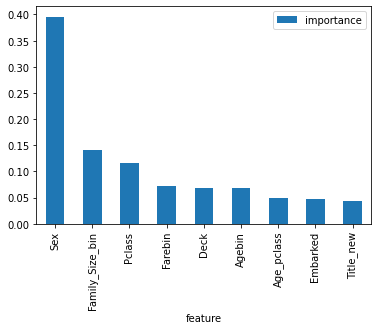

In [226]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dectree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot(kind='bar')

In [228]:
df_all[['Title','Title_new']].value_counts()

Title          Title_new
 Mr            2            757
 Miss          1            260
 Mrs           3            197
 Master        0             61
 Rev           4              8
 Dr            4              8
 Col           4              4
 Ms            4              2
 Major         4              2
 Mlle          4              2
 Sir           4              1
 Capt          4              1
 Mme           4              1
 Lady          4              1
 Jonkheer      4              1
 Dona          4              1
 Don           4              1
 the Countess  4              1
dtype: int64